In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# prompt: generate code to unzip /content/drive/MyDrive/archive.zip this file at /content folder
import zipfile
import os


# Define the path to the zip file and the extraction directory
zip_file_path = "/content/drive/MyDrive/archive.zip"
extract_dir = "/content"

# Check if the zip file exists
if os.path.exists(zip_file_path):
    try:
        # Create a ZipFile object
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            # Extract all contents to the specified directory
            zip_ref.extractall(extract_dir)
        print(f"Successfully extracted '{zip_file_path}' to '{extract_dir}'")
    except zipfile.BadZipFile:
        print(f"Error: '{zip_file_path}' is not a valid zip file.")
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print(f"Error: '{zip_file_path}' does not exist.")


Successfully extracted '/content/drive/MyDrive/archive.zip' to '/content'


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import os
import glob as gb
import glob
import cv2
import tensorflow as tf
import sklearn


In [ ]:
# from tensorflow.keras.applications.mobilenet_v2 import  preprocess_input

In [12]:
train='/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'


In [14]:
size=224

In [16]:
train_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.0,
    height_shift_range=0.0,
    shear_range=0.0,
    zoom_range=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1/255.0,
    preprocessing_function=None,
    validation_split=0.1,
).flow_from_directory(train,
                      batch_size=164,
                      target_size=(size,size),
                      subset="training",
                      color_mode='rgb', #"rgb", "rgba", or "grayscale"
                      class_mode='categorical',  # Use 'binary', 'sparse','categorical' or None as needed
                      shuffle=True)

Found 63282 images belonging to 38 classes.


In [ ]:
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

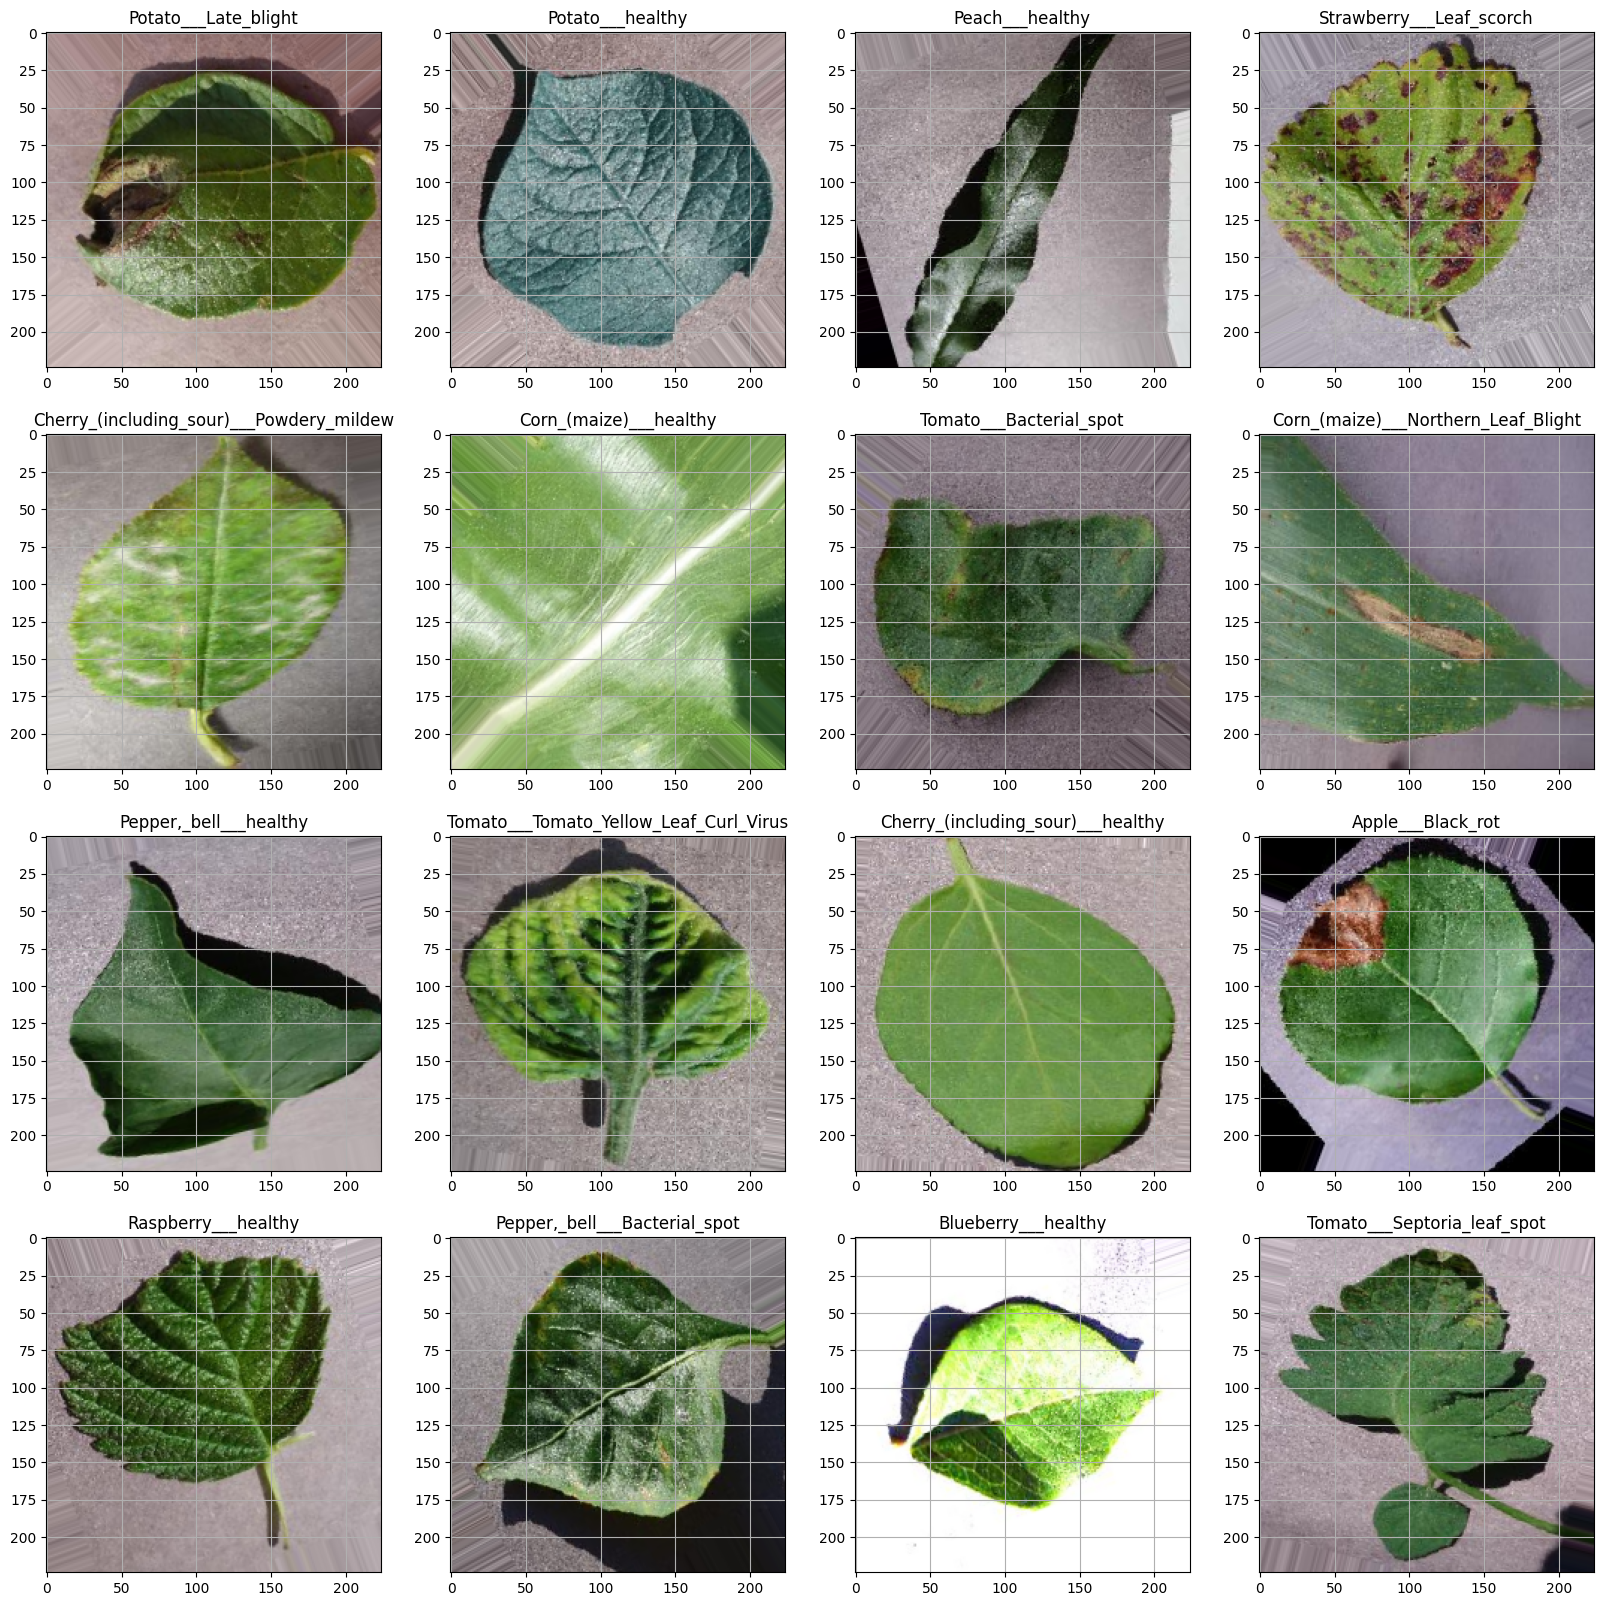

In [17]:
#let's display some images from training set

classes=list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in train_generator:
    # create a grid of 3x3 images
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])   # when y is categorical
        # plt.title(classes[int(y_batch[i])])   # when y is binary or sparse
        plt.grid(None)
    # show the plot
    plt.show()
    break


In [18]:
valid='/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid'


In [19]:
valid_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function=None,
    validation_split=0.1,
).flow_from_directory(valid,
                      batch_size=164,
                      target_size=(224,224),
                      subset='validation',
                      color_mode='rgb', #"rgb", "rgba", or "grayscale"
                      class_mode='categorical',  # Use 'binary', 'sparse','categorical' or None as needed
                      shuffle=False)

Found 1742 images belonging to 38 classes.


In [20]:
test='/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid'
test_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function=None,
).flow_from_directory(test,
                      batch_size=164,
                      target_size=(224,224),
                      color_mode='rgb', #"rgb", "rgba", or "grayscale"
                      class_mode='categorical',  # Use 'binary', 'sparse','categorical' or None as needed
                      shuffle=False)

Found 17572 images belonging to 38 classes.


In [21]:
test_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [6]:
# Splitting the train and test dataset
# dataset
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12]])
y = np.array([0, 1, 0, 1, 0, 1])

# perform train test split
from sklearn.model_selection import train_test_split

# Split the data: 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting splits
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (4, 2) (4,)
Testing data shape: (2, 2) (2,)


In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define the directory path for training data
train_dir = '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'  # Update this path to your actual training data directory

# Create an ImageDataGenerator instance
train_datagen = ImageDataGenerator(rescale=1./255)

# Create train_data generator
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Update target size as needed
    batch_size=32,
    class_mode='binary'  # Use 'categorical' if you have more than two classes
)

# Define the directory path for valid data
val_dir = '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid'

# Create an ImageDataGenerator instance for validation data
valid_datagen = ImageDataGenerator(rescale=1./255)

# Create valid_data generator
valid_data = valid_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150), # Update target size as needed
    batch_size=32,
    class_mode='binary' # Use 'categorical' if you have more than two classes
)

# Get class labels from the generator
class_labels = list(train_data.class_indices.keys())

# Count the number of samples per class
train_class_counts = {label: train_data.classes.tolist().count(index) for label, index in train_data.class_indices.items()}
valid_class_counts = {label: valid_data.classes.tolist().count(index) for label, index in valid_data.class_indices.items()}

print("Class labels:", class_labels)
print("Training class counts:", train_class_counts)
print("Validation class counts:", valid_class_counts)


Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.
Class labels: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold

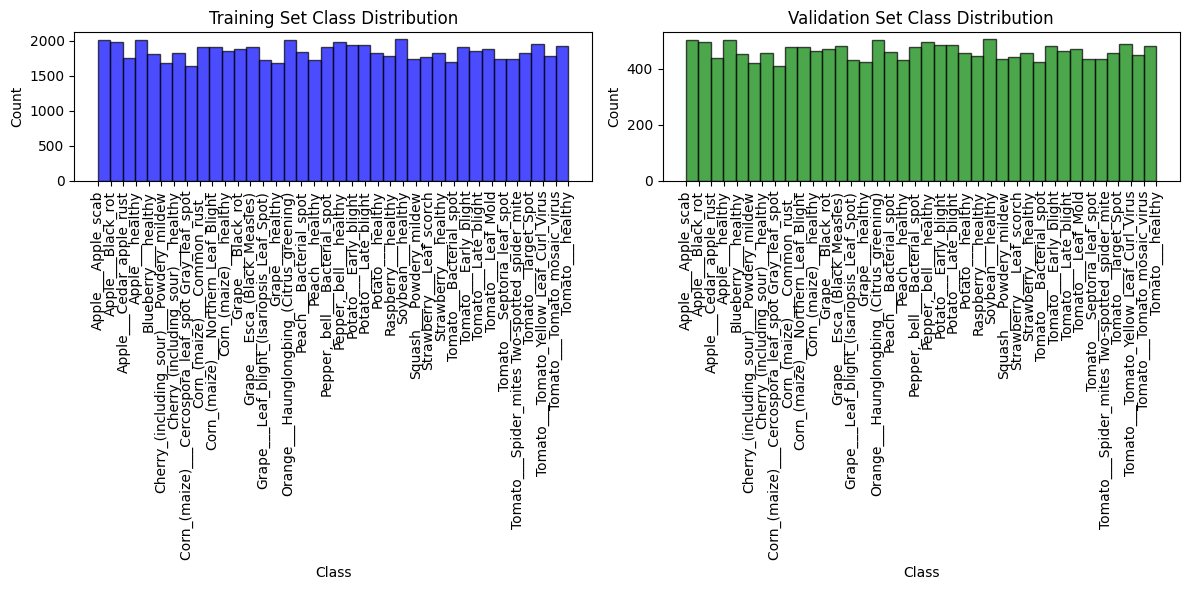

In [26]:
# EDA

# Get class labels from the generator
class_labels = list(train_data.class_indices.keys())

# Count the number of samples per class
train_counts = train_data.classes
valid_counts = valid_data.classes

# Plot the class distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(train_counts, bins=len(class_labels), alpha=0.7, color='blue', edgecolor='black')
plt.title('Training Set Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(range(len(class_labels)), class_labels, rotation=90)

plt.subplot(1, 2, 2)
plt.hist(valid_counts, bins=len(class_labels), alpha=0.7, color='green', edgecolor='black')
plt.title('Validation Set Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(range(len(class_labels)), class_labels, rotation=90)

plt.tight_layout()
plt.show()

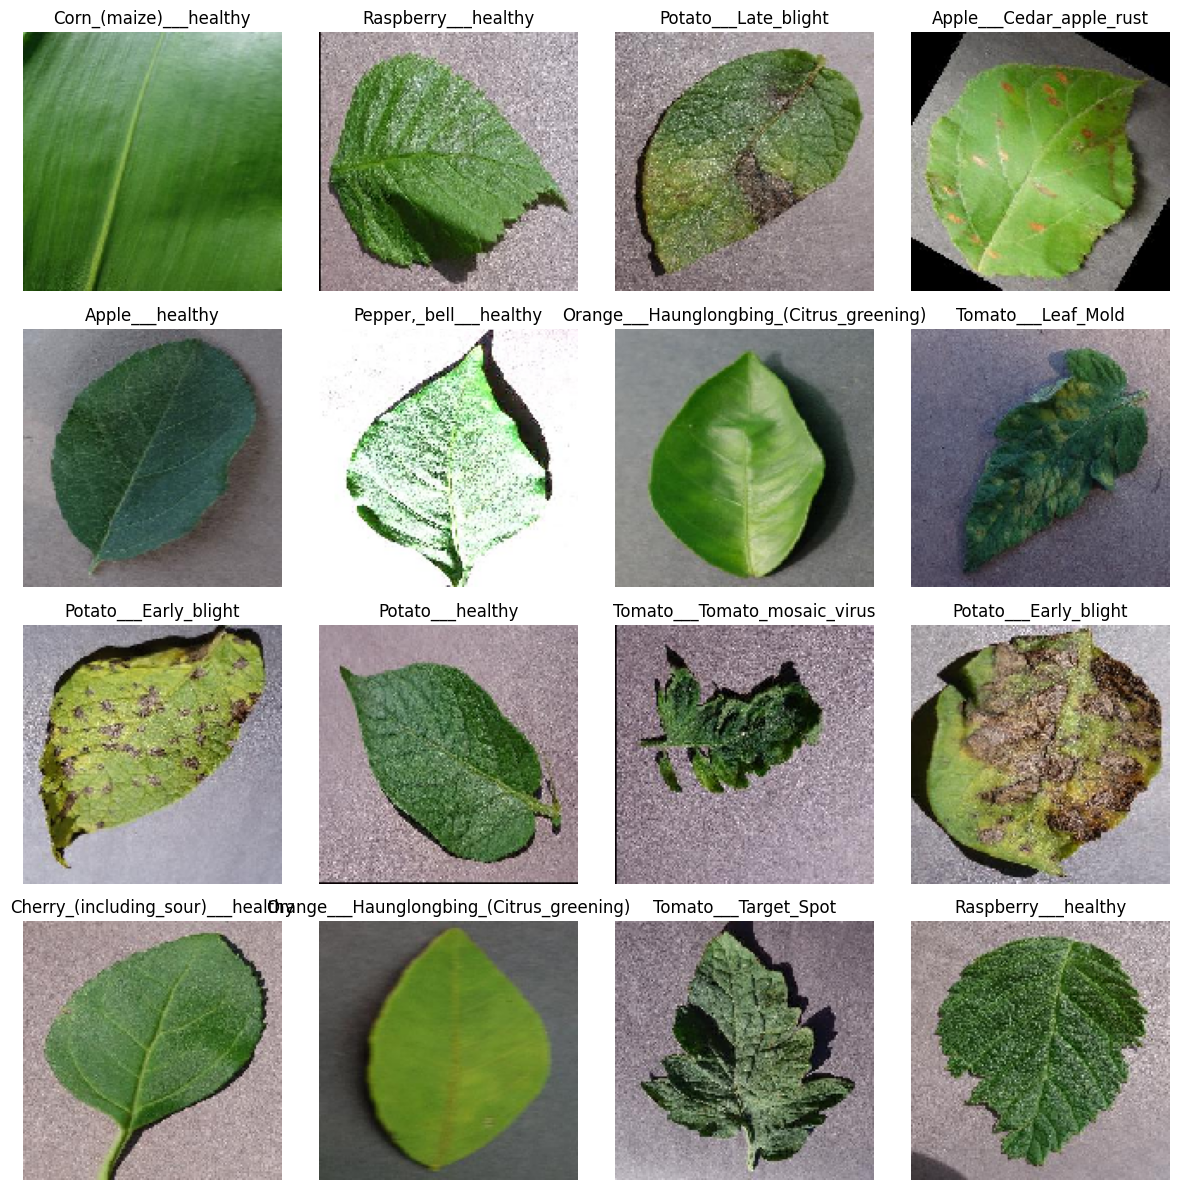

In [27]:
#let's visualize images with normalization to ensure that the data are correctly loaded and preprocessed

def plot_samples(generator, class_labels):
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))
    axes = axes.flatten()

    for i in range(16):
        img_batch, label_batch = next(generator)
        img = img_batch[0]  # Get the first image in the batch

        # Normalize image if values are outside the expected range
        if img.max() > 1.0:  # Assuming the max value is 255
            img = img / 255.0

        label = label_batch[0]  # Get the first label in the batch
        ax = axes[i]
        ax.imshow(img)

        # Determine if the label is one-hot encoded or not
        if label.ndim > 0 and label.shape[-1] > 1:  # One-hot encoded
            label_idx = np.argmax(label)
        else:  # Not one-hot encoded
            label_idx = int(label)

        ax.set_title(class_labels[label_idx])
        ax.axis('off')

    plt.tight_layout()
    plt.show()

plot_samples(train_data, class_labels)

In [4]:
# implement a baseline model(Logistic regression) and evaluate it
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the logistic regression model
model = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('log_reg', LogisticRegression(random_state=42))
])

# Perform cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation accuracy: {np.mean(scores)}")
print(f"Standard deviation: {np.std(scores)}")

# Define the hyperparameters and their possible values
param_grid = {
    'log_reg__C': [0.01, 0.1, 1, 10, 100],
    'log_reg__penalty': ['l1', 'l2'],  # L1 is Lasso and L2 is Ridge
    'log_reg__solver': ['liblinear']  # 'liblinear' solver supports L1 penalty
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best hyperparameters: {best_params}")
print(f"Best cross-validation accuracy: {best_score}")

# Train the model with the best parameters on the full training set
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the model on the test set
test_accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")



Cross-validation scores: [0.79285714 0.81428571 0.85       0.91428571 0.85      ]
Mean cross-validation accuracy: 0.8442857142857143
Standard deviation: 0.041255797366267576
Best hyperparameters: {'log_reg__C': 0.1, 'log_reg__penalty': 'l1', 'log_reg__solver': 'liblinear'}
Best cross-validation accuracy: 0.8585714285714285
Test Accuracy: 0.8433333333333334


In [28]:
#implement baseline model using decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import make_classification

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Train the baseline model
model.fit(X_train, y_train)

# Evaluate the baseline model on the test set
test_accuracy = model.score(X_test, y_test)
print(f"Test Accuracy of the baseline model: {test_accuracy}")

# Perform cross-validation to evaluate the baseline model
cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation scores of the baseline model: {cross_val_scores}")
print(f"Mean cross-validation accuracy: {np.mean(cross_val_scores)}")
print(f"Standard deviation: {np.std(cross_val_scores)}")


Test Accuracy of the baseline model: 0.7933333333333333
Cross-validation scores of the baseline model: [0.855 0.82  0.83  0.825 0.835]
Mean cross-validation accuracy: 0.833
Standard deviation: 0.012083045973594584


In [3]:
# using random forest to train
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print(f"Train Accuracy: {model.score(X_train, y_train)}")
print(f"Test Accuracy: {model.score(X_test, y_test)}")


Train Accuracy: 1.0
Test Accuracy: 0.9233333333333333


In [ ]:
#tuning hyperparameters

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import make_classification

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=3, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the Random Forest model
model = RandomForestClassifier(random_state=42)

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best hyperparameters: {best_params}")
print(f"Best cross-validation accuracy: {best_score}")

# Train the model with the best parameters on the full training set
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the model on the test set
test_accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")



Best hyperparameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accuracy: 0.8099999999999999
Test Accuracy: 0.8266666666666667


In [ ]:
# feature engineering for improvement
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=3, random_state=42)

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(X.shape[1])])
df['target'] = y

# Handling missing values (example: replacing NaNs with mean)
imputer = SimpleImputer(strategy='mean')

# Encoding categorical variables (example: OneHotEncoding)
encoder = OneHotEncoder()

# Feature scaling
scaler = StandardScaler()

# Feature transformation (example: Polynomial Features)
poly = PolynomialFeatures(degree=2, include_bias=False)

# Combine all feature engineering steps into a pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('impute', imputer), ('scale', scaler)]), [f'feature_{i}' for i in range(X.shape[1])])
    ]
)

# pipeline for feature engineering
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('poly', poly)])

# Apply feature engineering
X_transformed = pipeline.fit_transform(df.drop(columns=['target']))
y_transformed = df['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_transformed, test_size=0.3, random_state=42)




In [ ]:
# Apply cross validation
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Generate synthetic dataset with increased n_informative
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=2, n_classes=3, n_clusters_per_class=2, random_state=42)

# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Define cross-validation settings
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {np.mean(scores)}")
print(f"Standard deviation: {np.std(scores)}")



Cross-validation scores: [0.865 0.825 0.785 0.775 0.755]
Mean accuracy: 0.8009999999999999
Standard deviation: 0.039293765408776986


In [30]:
#cross-validation and hyperparameter tuning for an SVM model using synthetic data.
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=3, random_state=42)

# Define the SVM model
model = make_pipeline(StandardScaler(), SVC(kernel='linear', random_state=42))

# Define cross-validation settings
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {np.mean(scores)}")
print(f"Standard deviation: {np.std(scores)}")

# Define the hyperparameters and their possible values
param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': [0.001, 0.01, 0.1, 1]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best hyperparameters: {best_params}")
print(f"Best cross-validation accuracy: {best_score}")

# Train the model with the best parameters on the full dataset
best_model = grid_search.best_estimator_
best_model.fit(X, y)

# If you want to evaluate on a separate test set, you can split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
test_accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")


Cross-validation scores: [0.745 0.68  0.655 0.7   0.67 ]
Mean accuracy: 0.6900000000000001
Standard deviation: 0.031144823004794854
Best hyperparameters: {'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
Best cross-validation accuracy: 0.8160000000000001
Test Accuracy: 0.98


In [ ]:
from tensorflow import keras
model = keras.models.Sequential()  # To build NN

model.add(keras.layers.Conv2D(filters=32, kernel_size=7, strides=1,
                padding="same", activation="relu", name="Conv1", input_shape= (224,224,3)))

model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool1"))

model.add(keras.layers.Conv2D(filters=64, kernel_size=5, strides=1,
                              padding="same", activation="relu", name="Conv2"))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool2"))

model.add(keras.layers.Conv2D(filters=128, kernel_size=3, strides=1,
                              padding="same", activation="relu", name="Conv3"))

model.add(keras.layers.Conv2D(filters=256, kernel_size=3, strides=1,
                              padding="same", activation="relu", name="Conv4"))

model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool3"))

model.add(keras.layers.Flatten(name="Flatten1"))   #flatten layer - to convert into 1d vector

model.add(keras.layers.Dense(128, activation="relu", name="Dense1"))  #hidden layer
tf.keras.layers.Dropout(0.5)

model.add(keras.layers.Dense(64, activation="relu", name="Dense2"))  #hidden layer
tf.keras.layers.Dropout(0.5)

model.add(keras.layers.Dense(38, activation="softmax", name="Output"))  #output layer

# The model’s summary() method displays all the model’s layers
print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                       │ (None, 224, 224, 32)        │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool1 (MaxPooling2D)                 │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 112, 112, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool2 (MaxPooling2D)                 │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv3 (Conv2D)                       │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv4 (Conv2D)                       │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool3 (MaxPooling2D)                 │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten1 (Flatten)                   │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense1 (Dense)                       │ (None, 128)                 │      25,690,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense2 (Dense)                       │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 38)                  │           2,470 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,125,990 (99.66 MB)

 Trainable params: 26,125,990 (99.66 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

model_ReduceLROnPlateau = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=15, min_lr=0.000001)

callbacks=[early_stopping,model_checkpoint,model_ReduceLROnPlateau]

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer= 'Adam', metrics=["accuracy","precision","recall"])

In [ ]:
history = model.fit(train_generator,
                    epochs          = 5,
                    validation_data = valid_generator,
                    callbacks = callbacks
                    )

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


386/386 ━━━━━━━━━━━━━━━━━━━━ 956s 2s/step - accuracy: 0.2249 - loss: 2.8561 - precision: 0.6757 - recall: 0.1031 - val_accuracy: 0.6257 - val_loss: 1.2529 - val_precision: 0.7506 - val_recall: 0.5184 - learning_rate: 0.0010
Epoch 2/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 883s 2s/step - accuracy: 0.7430 - loss: 0.8247 - precision: 0.8357 - recall: 0.6593 - val_accuracy: 0.7974 - val_loss: 0.6321 - val_precision: 0.8432 - val_recall: 0.7532 - learning_rate: 0.0010
Epoch 3/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 852s 2s/step - accuracy: 0.8497 - loss: 0.4648 - precision: 0.8922 - recall: 0.8151 - val_accuracy: 0.8485 - val_loss: 0.4514 - val_precision: 0.8845 - val_recall: 0.8134 - learning_rate: 0.0010
Epoch 4/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 850s 2s/step - accuracy: 0.9001 - loss: 0.3108 - precision: 0.9226 - recall: 0.8797 - val_accuracy: 0.9013 - val_loss: 0.3161 - val_precision: 0.9171 - val_recall: 0.8823 - learning_rate: 0.0010
Epoch 5/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 860s 2s/step - accuracy: 0.9207 - l

In [ ]:
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

precision = history.history['precision']
val_precision = history.history['val_precision']

recall =history.history['recall']
val_recall =history.history['val_recall']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

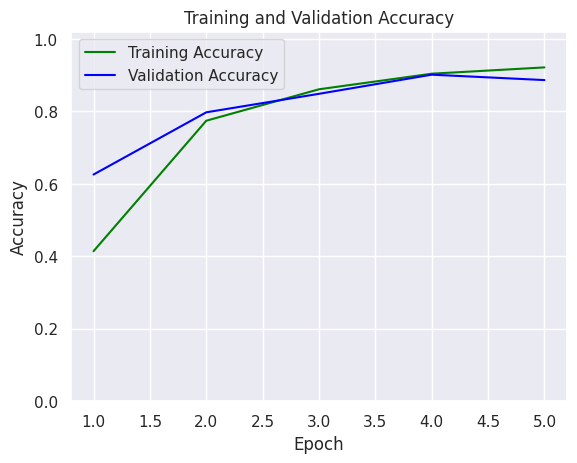

In [ ]:
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim(0,1.02)
plt.show()

In [ ]:
model_evaluate = model.evaluate(test_generator)
print("Loss     : ",model_evaluate[0])
print("Accuracy : ",model_evaluate[1])
print("Precision  : ",model_evaluate[2])
print("Recall : ",model_evaluate[3])

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


108/108 ━━━━━━━━━━━━━━━━━━━━ 41s 383ms/step - accuracy: 0.9031 - loss: 0.2989 - precision: 0.9220 - recall: 0.8886
Loss     :  0.3007347881793976
Accuracy :  0.9009788036346436
Precision  :  0.9216442108154297
Recall :  0.8842476606369019


In [ ]:
model.save('CNN_plantdiseases_model.keras')